<a href="https://colab.research.google.com/github/bilalbenmessahel/deep-learning/blob/main/Lr_MedCostPerso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Medical Cost Personal Dataset
The Medical Cost Personal Dataset is a widely-used dataset in machine learning and statistics, typically applied in regression tasks to predict healthcare costs based on demographic and health-related features.


# Step 1: Import Libraries

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #Data manipulation


# # Step 2: Load data   


In [ ]:
# Load the dataset
import requests

# GitHub raw URL for the insurance.csv file (replace this with the actual URL)
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'

# Send an HTTP request to get the content
response = requests.get(url)

# Save the content to a local file
with open('insurance.csv', 'wb') as f:
    f.write(response.content)

print("Dataset downloaded successfully!")

# Load the dataset into pandas
data = pd.read_csv('insurance.csv')
print(data.shape)
# Show the first few rows of the dataset
print(data.head())
data.isnull().sum()


Dataset downloaded successfully!
(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# Dataset visualizations
Visualize Relationships Between Features and charges

<ipython-input-120-2f8431cfbbb3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=data, palette="viridis", ax=axes[0, 1])
<ipython-input-120-2f8431cfbbb3>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=data, palette="Set2", ax=axes[1, 0])


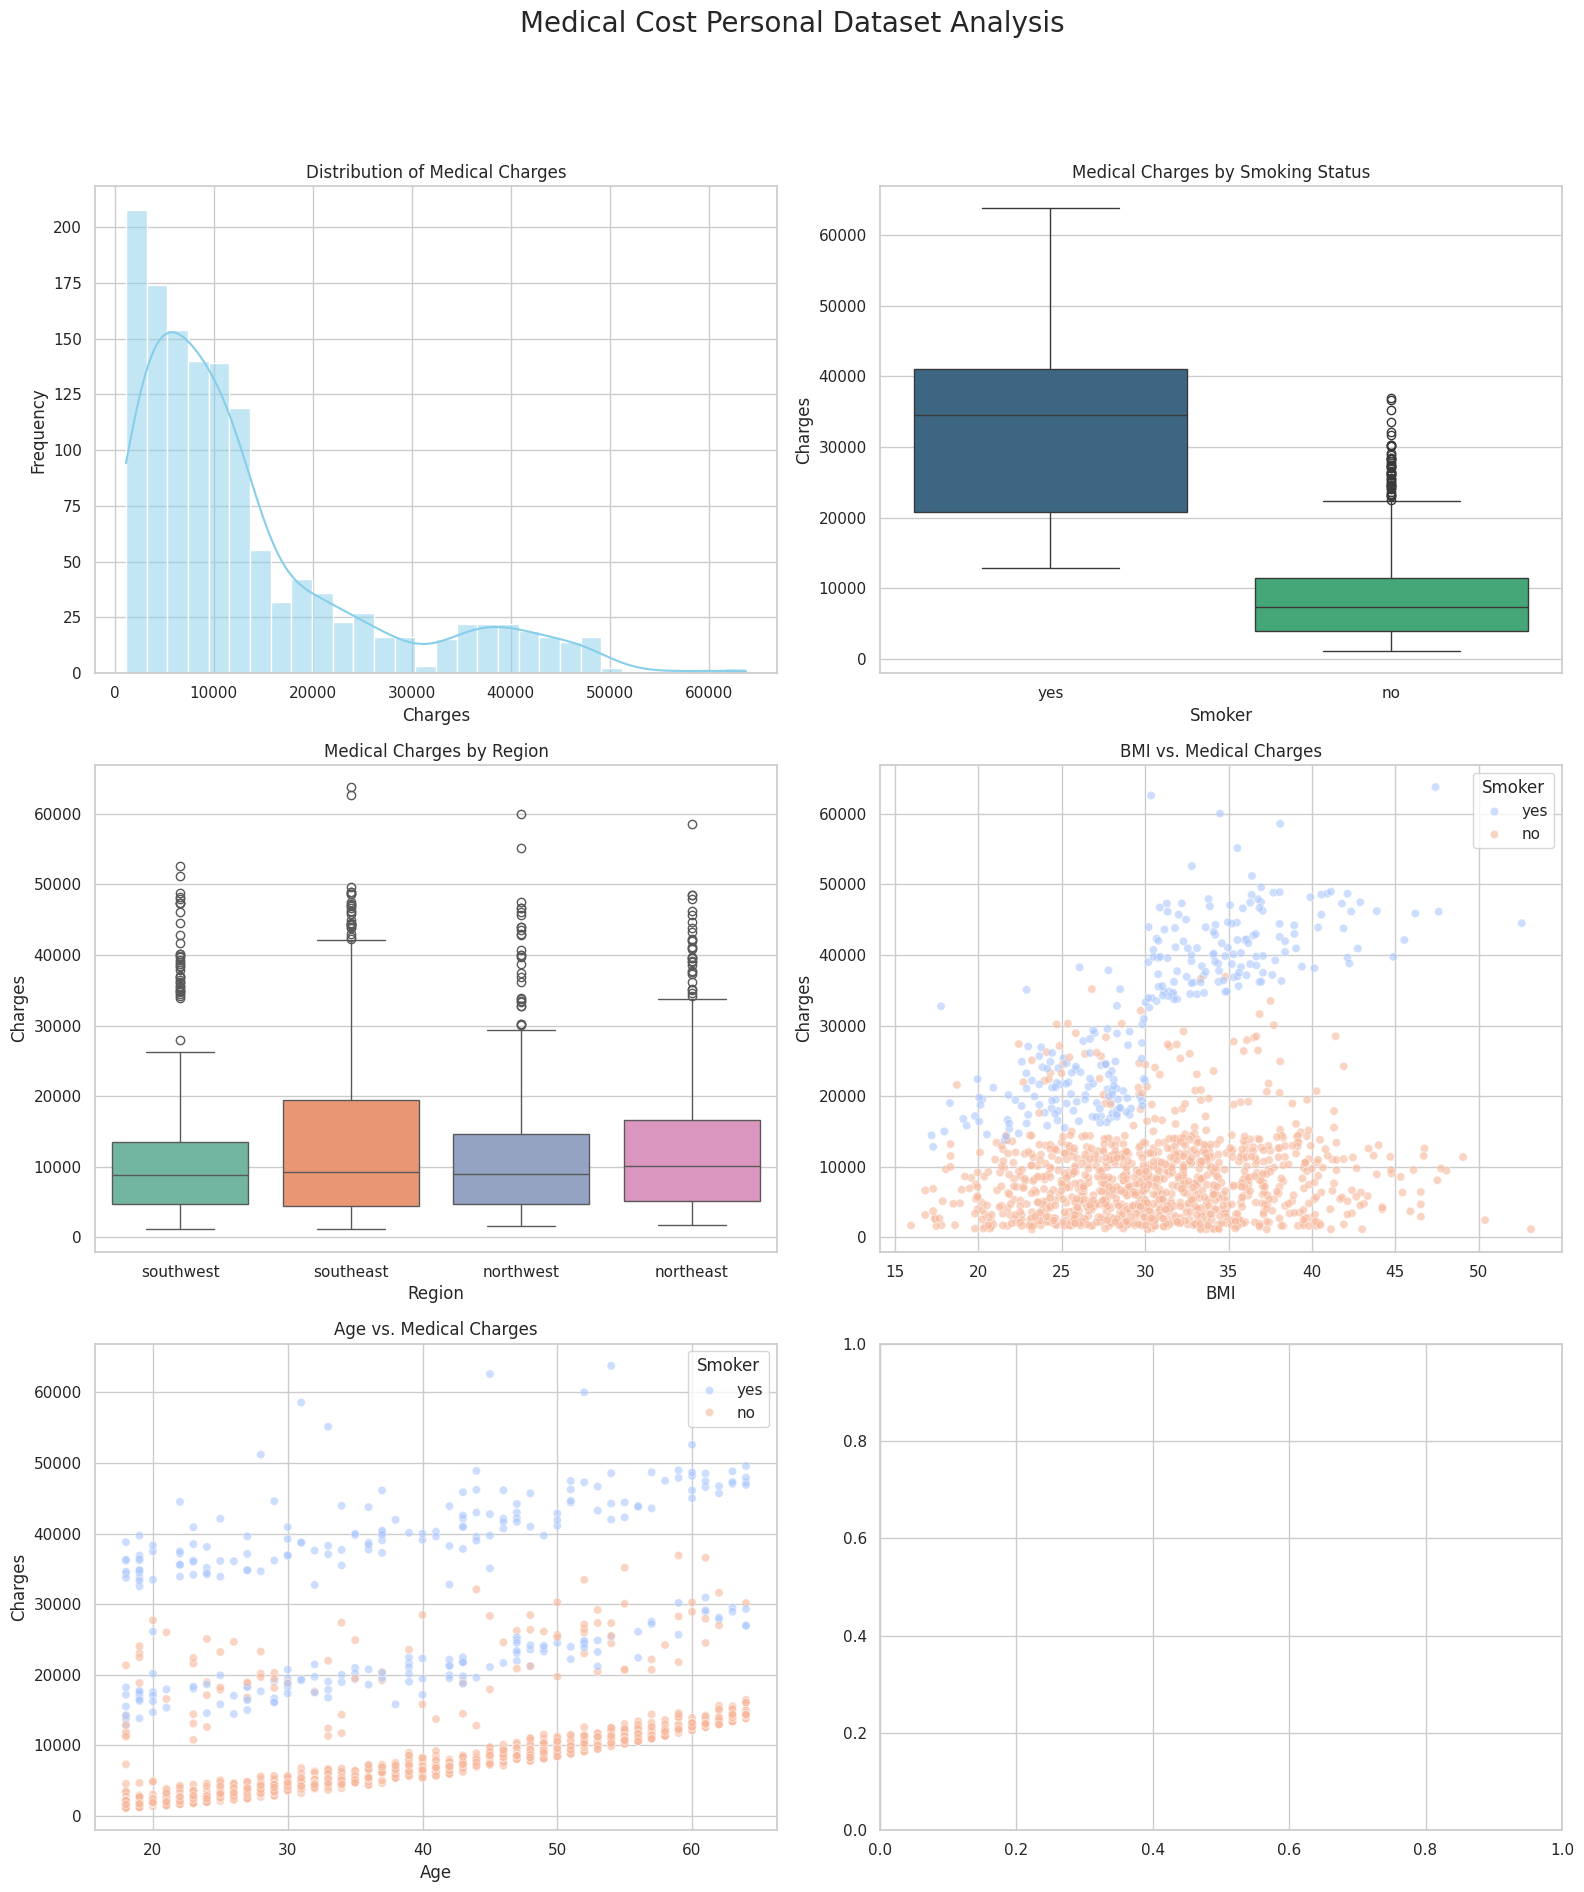

In [ ]:

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure and a grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Medical Cost Personal Dataset Analysis', fontsize=20, y=1.05)

# Distribution of Charges
sns.histplot(data['charges'], kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Medical Charges')
axes[0, 0].set_xlabel('Charges')
axes[0, 0].set_ylabel('Frequency')

# Boxplot of Charges by Smoker
sns.boxplot(x='smoker', y='charges', data=data, palette="viridis", ax=axes[0, 1])
axes[0, 1].set_title('Medical Charges by Smoking Status')
axes[0, 1].set_xlabel('Smoker')
axes[0, 1].set_ylabel('Charges')

# Boxplot of Charges by Region
sns.boxplot(x='region', y='charges', data=data, palette="Set2", ax=axes[1, 0])
axes[1, 0].set_title('Medical Charges by Region')
axes[1, 0].set_xlabel('Region')
axes[1, 0].set_ylabel('Charges')

# Scatterplot of BMI vs. Charges with Smoker Hue
sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker', palette="coolwarm", alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title('BMI vs. Medical Charges')
axes[1, 1].set_xlabel('BMI')
axes[1, 1].set_ylabel('Charges')
axes[1, 1].legend(title='Smoker')

# Scatterplot of Age vs. Charges with Smoker Hue
sns.scatterplot(x='age', y='charges', data=data, hue='smoker', palette="coolwarm", alpha=0.6, ax=axes[2, 0])
axes[2, 0].set_title('Age vs. Medical Charges')
axes[2, 0].set_xlabel('Age')
axes[2, 0].set_ylabel('Charges')
axes[2, 0].legend(title='Smoker')

# Adjust layout
plt.tight_layout()
plt.show()

# Preprocess Data

In [ ]:
# Encode categorical variables
data_encode = data
data_encode['sex'] = LabelEncoder().fit_transform(data['sex'])
data_encode['smoker'] = LabelEncoder().fit_transform(data['smoker'])
data_encode['region']=LabelEncoder().fit_transform(data['region'])
#data_encode = pd.get_dummies(data, columns=['region'], drop_first=True)
# Dummy variable
#categorical_columns = ['sex','children', 'smoker', 'region']
#data_encode = pd.get_dummies(data = data, prefix = 'OHE', prefix_sep='_',
#                           columns = categorical_columns, drop_first =True, dtype='int8')

print(data_encode.head())
data_encode['charges'] = np.log(data_encode['charges'])

   age  sex     bmi  children  smoker  region   charges
0   19    0  27.900         0       1       3  0.822263
1   18    1  33.770         1       0       2  0.697466
2   28    1  33.000         3       0       2  0.755322
3   33    1  22.705         0       0       1  0.833950
4   32    1  28.880         0       0       1  0.747374


In [ ]:
# Separate features and target
X = data_encode.drop(columns=['charges']).values
y = data_encode['charges'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

#  Define the Linear Regression Model

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # One output for regression

    def forward(self, x):
        return self.linear(x)

# # Initialize model, loss function, and optimizer

In [ ]:
input_dim = X_train_tensor.shape[1]
model = LinearRegressionModel(input_dim)
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
#optimizer = optim.SGD(model.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training the model

In [ ]:
# Training the model
num_epochs = 500
training_losses = []
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    training_losses.append(loss.item())

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [50/500], Loss: 0.2628
Epoch [100/500], Loss: 0.1613
Epoch [150/500], Loss: 0.0965
Epoch [200/500], Loss: 0.0567
Epoch [250/500], Loss: 0.0330
Epoch [300/500], Loss: 0.0191
Epoch [350/500], Loss: 0.0111
Epoch [400/500], Loss: 0.0065
Epoch [450/500], Loss: 0.0039
Epoch [500/500], Loss: 0.0025


# Loss Plot:

0.0024756602942943573


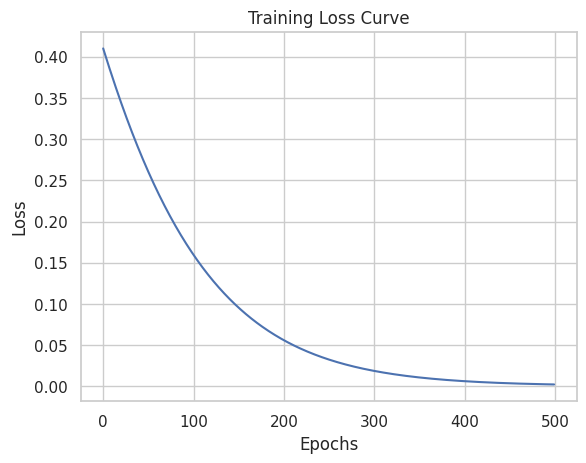

In [ ]:
# Plot the loss
print(training_losses[-1])
plt.plot(training_losses)
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# # Evaluating the model on test data

In [ ]:
# Evaluating the model on test data
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Mean Absolute Error (MAE)
mae = torch.mean(torch.abs(test_predictions-y_test_tensor))
print("Mean Absolute Error:", mae.item())

# Mean Squared Error (MSE)
mse = torch.mean((test_predictions - y_test_tensor) ** 2)
print("Mean Squared Error:", mse.item())

# Root Mean Squared Error (RMSE)
rmse = torch.sqrt(mse)
print("Root Mean Squared Error:", rmse.item())

# R² Score
# First, calculate the total sum of squares (TSS) and residual sum of squares (RSS)
tss = torch.sum((y_test_tensor - torch.mean(y_test_tensor)) ** 2)
rss = torch.sum((y_test_tensor - test_predictions) ** 2)
r2 = 1 - (rss / tss)
print("R² Score:", r2.item())

Test Loss: 0.0024
Mean Absolute Error: 0.038402922451496124
Mean Squared Error: 0.002394072711467743
Root Mean Squared Error: 0.04892926290631294
R² Score: 0.38312608003616333


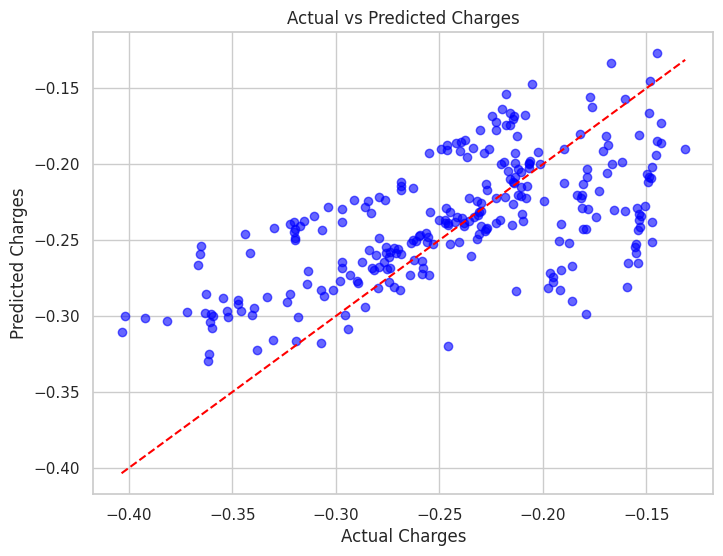

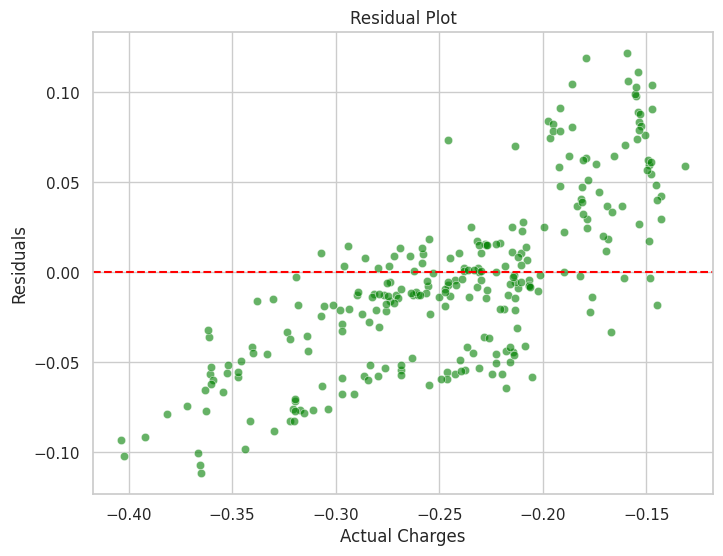

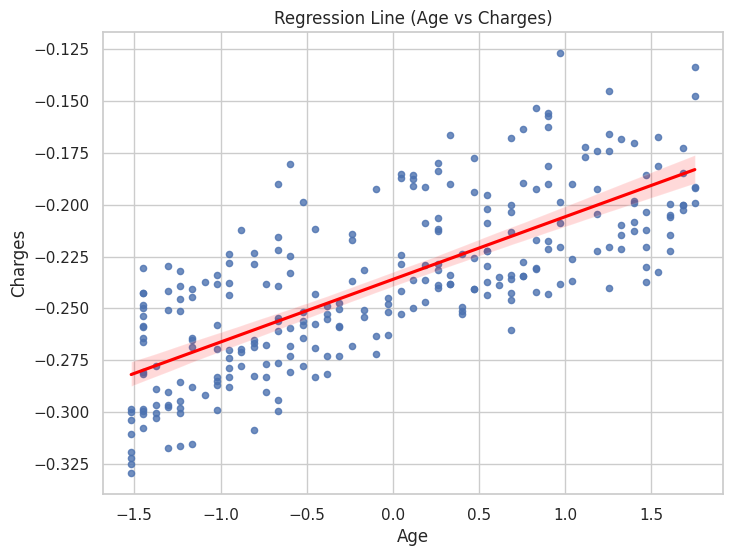

In [ ]:

# Assuming your model has been trained and you have y_test (true charges) and y_pred (predicted charges)
y_test = y_test_tensor.numpy()
y_pred = test_predictions.numpy()

# Scatter plot: Actual vs Predicted charges
plt.figure(figsize=(8, 6))
# Flatten y_test and y_pred before plotting
plt.scatter(y_test.ravel(), y_pred.ravel(), color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

# Residual plot: Actual vs Residuals (y_test - y_pred)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
# Flatten residuals and y_test before plotting
sns.scatterplot(x=y_test.ravel(), y=residuals.ravel(), color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0 for residuals
plt.title('Residual Plot')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.show()


# Optional: Regression Line if you're using a single feature for visualization
# Replace 'feature_name' with the name of the feature you are using, e.g., 'age', 'bmi', etc.
# If using all features, this would typically be unnecessary, but this is for visualizing a single feature.

plt.figure(figsize=(8, 6))
sns.regplot(x=X_test[:,0].ravel(), y=y_pred.ravel(), scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Regression Line (Age vs Charges)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()
